## Task of Feature Engineering

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv("/content/drive/MyDrive/DS_Project/prosperloandata_cleaned.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ProsperRatingCombined,LoanOriginationYear
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,0,2009-08-14 00:00:00,0.16516,0.1580,0.1380,0.13885,0.0724,0.06645,6,Not Available,CO,Other,Self-employed,2.0,True,True,Unknown,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.0,E33A3400205839220442E84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.277295,0,16.190707,78,19141,9425,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,C,2013
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,0,Unknown,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,7,Home Improvement,CO,Professional,Employed,44.0,False,False,Unknown,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.0,9E3B37071505919926B1D82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.277295,0,16.190707,0,134815,10000,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,A,2014
2,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,0,Unknown,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,9,Motorcycle,GA,Skilled Labor,Employed,113.0,True,False,Unknown,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.0,A0393664465886295619C51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.277295,0,16.190707,16,77296,10000,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,A,2012
3,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,0,Unknown,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,4,Home Improvement,MN,Executive,Employed,44.0,True,False,Unknown,2013-09-14 18:38:44,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.0,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,-3.277295,0,16.190707,6,102670,15000,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,D,2013
4,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,60,0,Unknown,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,10,Debt Consolidation,NM,Professional,Employed,82.0,True,False,Unknown,2013-12-

In [4]:
df.isnull().sum().sort_values(ascending=False)

ListingKey                             0
OnTimeProsperPayments                  0
LoanFirstDefaultedCycleNumber          0
LoanCurrentDaysDelinquent              0
ScorexChangeAtTimeOfListing            0
ProsperPrincipalOutstanding            0
ProsperPrincipalBorrowed               0
ProsperPaymentsOneMonthPlusLate        0
ProsperPaymentsLessThanOneMonthLate    0
TotalProsperPaymentsBilled             0
LoanNumber                             0
TotalProsperLoans                      0
LoanKey                                0
StatedMonthlyIncome                    0
IncomeVerifiable                       0
IncomeRange                            0
DebtToIncomeRatio                      0
TradesOpenedLast6Months                0
LoanMonthsSinceOrigination             0
LoanOriginalAmount                     0
TotalTrades                            0
LP_NetPrincipalLoss                    0
ProsperRatingCombined                  0
Investors                              0
InvestmentFromFr

### 1 - Encoding Categorical Variables

In [5]:
df.select_dtypes('object').columns

Index(['ListingKey', 'ListingCreationDate', 'ClosedDate',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'GroupKey', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey',
       'LoanOriginationQuarter', 'MemberKey', 'ProsperRatingCombined'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['ListingKey', 'ListingCreationDate', 'ClosedDate',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'GroupKey', 'DateCreditPulled',
       'FirstRecordedCreditLine', 'IncomeRange', 'LoanKey',
       'LoanOriginationQuarter', 'MemberKey', 'ProsperRatingCombined']

# Encode labels of multiple columns at once

df[cols] = df[cols].apply(LabelEncoder().fit_transform)

# Print head

df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ProsperRatingCombined,LoanOriginationYear
0,6591,193129,5925,36,0,808,0.16516,0.1580,0.1380,0.13885,0.0724,0.06645,6,13,5,35,6,2.0,True,True,543,6070,640.0,659.0,8529,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,3,True,3083.0,92169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.277295,0,16.190707,78,19141,9425,14,10174,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,3,2013
1,6604,1209647,102658,36,0,2474,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,7,8,5,41,0,44.0,False,False,543,102647,680.0,699.0,6512,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,4,True,6125.0,64152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.277295,0,16.190707,0,134815,10000,6,9464,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,0,2014
2,6125,658116,55533,36,0,2474,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,9,12,10,50,0,113.0,True,False,543,55497,800.0,819.0,2182,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,3,True,2875.0,64993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.277295,0,16.190707,16,77296,10000,26,50557,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158,0,2012
3,6141,909464,76733,36,0,2474,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,4,8,23,19,0,44.0,True,False,543,76623,680.0,699.0,9384,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,2,True,9583.0,65558,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,-3.277295,0,16.190707,6,102670,15000,20,17901,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20,4,2013
4,6144,1074836,91074,60,0,2474,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,10,5,32,41,0,82.0,True,False,543,91146,740.0,759.0,487,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,2,True,8333.0,79422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.277295,0,16.190707,3,123257,15000,27,44198,342.37,679.34,351.89,327.45,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,2,2013


In [7]:
# convert Prosper Score, Prosper Score Alpha, Loan Original Month, Year, Income Range into ordered categorical types
ordinal_var_dict = {'LoanOriginationYear': [2009, 2010, 2011, 2012, 2013, 2014],
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [8]:
le_10_val_col = []
mt_10_val_col = []
obj_val_col = []
for col in df.columns:
    if (len(df[col].unique()) <= 10) & (df[col].dtypes == 'int64'):
        le_10_val_col.append(col)
    elif (len(df[col].unique()) > 10) & (df[col].dtypes == 'int64'):
        mt_10_val_col.append(col)

In [9]:
mt_10_val_col

['ListingKey',
 'ListingNumber',
 'ListingCreationDate',
 'ClosedDate',
 'ProsperScore',
 'ListingCategory (numeric)',
 'BorrowerState',
 'Occupation',
 'GroupKey',
 'DateCreditPulled',
 'FirstRecordedCreditLine',
 'OpenRevolvingAccounts',
 'LoanKey',
 'LoanCurrentDaysDelinquent',
 'LoanMonthsSinceOrigination',
 'LoanNumber',
 'LoanOriginalAmount',
 'LoanOriginationQuarter',
 'MemberKey',
 'Recommendations',
 'InvestmentFromFriendsCount',
 'Investors']

In [10]:
from scipy.stats import zscore

z_scores = df[mt_10_val_col].apply(zscore)

upper_thresholds = df[mt_10_val_col].mean() + 3 * df[mt_10_val_col].std()
lower_thresholds = df[mt_10_val_col].mean() - 3 * df[mt_10_val_col].std()

outlier_rows = ((z_scores > 3) | (z_scores < -3)).any(axis=1)
df_no_outliers = df[~outlier_rows]

In [11]:
#Dimensionality Reduction 1

#Dropping Redundant columns
df.drop(["ListingNumber", "LoanKey", "LoanNumber","ListingCreationDate"], axis=1, inplace=True)

#since Borroer APR and LenderYied are forms of BorrowerRate, they can be removed, also the majority of the records are funded hence percentfunded won't give a much different result
df.drop(["BorrowerAPR", "LenderYield","PercentFunded"], axis=1, inplace=True)

#### Train Test Split

In [12]:
X = df.drop(columns=['LoanStatus'])
y = df['LoanStatus']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2 - Feature Importance Scores from a Random Forest model & Feature Importance using Correlation Analysis

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [16]:
feature_importance_df.head()

,Feature,Importance
50,LoanCurrentDaysDelinquent,1.0
0,ListingKey,0.0
45,ProsperPaymentsLessThanOneMonthLate,0.0
51,LoanFirstDefaultedCycleNumber,0.0
49,ScorexChangeAtTimeOfListing,0.0


In [17]:
numerical = df.select_dtypes(include=['float', 'int'])
correlation_matrix = numerical.corr()
target_correlation = correlation_matrix['LoanStatus'].abs().sort_values(ascending=False)
print("Correlation with target variable:")
print(target_correlation)

Correlation with target variable:
LoanStatus                             1.000000
LoanCurrentDaysDelinquent              0.825239
LP_GrossPrincipalLoss                  0.684640
LP_NetPrincipalLoss                    0.681907
ClosedDate                             0.413960
LoanMonthsSinceOrigination             0.368904
DateCreditPulled                       0.353494
InquiriesLast6Months                   0.226059
TotalInquiries                         0.219135
LP_NonPrincipalRecoverypayments        0.216125
EstimatedReturn                        0.202916
LP_CollectionFees                      0.184665
CreditScoreRangeUpper                  0.182040
CreditScoreRangeLower                  0.182040
BorrowerRate                           0.180494
EstimatedEffectiveYield                0.169635
TradesNeverDelinquent (percentage)     0.142719
ProsperRatingCombined                  0.128646
EmploymentStatus                       0.125949
ListingCategory (numeric)              0.124785
Curren

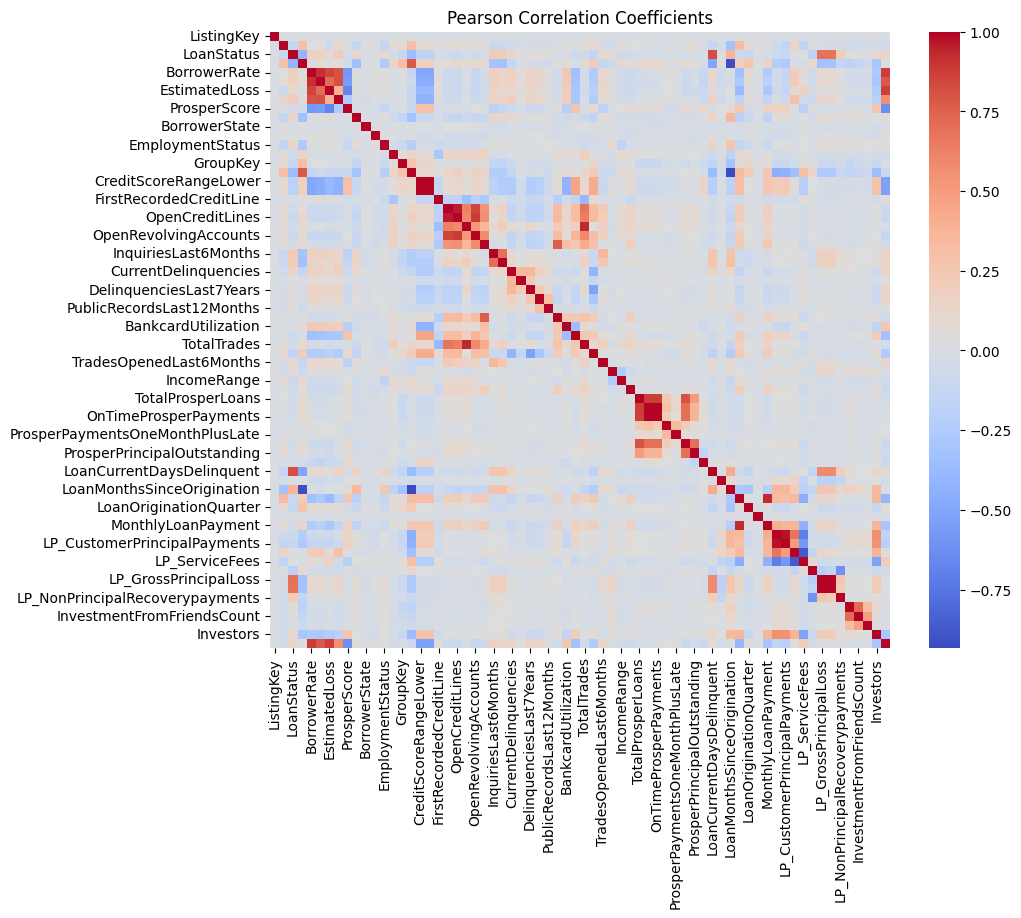

In [18]:
# Create heatmaps for Pearson correlation coefficients
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Pearson Correlation Coefficients')
plt.show()

### 3 - Principal Component Analysis (PCA)

Explained Variance Ratio: [0.10898464 0.08154474 0.07096392]
Loadings: [[-3.35685486e-03  6.32860645e-02  9.35934662e-02 -2.71089965e-01
  -2.48881532e-01 -2.44171763e-01 -2.05564415e-01  1.78298715e-01
  -7.53860569e-02  5.23279118e-03 -2.90146635e-02 -4.51389656e-02
   5.56173284e-02  5.53933105e-02 -1.34853699e-02  4.28627040e-02
   1.09964748e-01  2.57213055e-01  2.57213055e-01 -6.36802086e-02
   1.72517721e-01  1.78931930e-01  1.05840602e-01  1.77104526e-01
   1.48193561e-01 -8.77499771e-02 -7.23263216e-02 -1.16401250e-01
  -4.10771319e-02 -1.13150191e-01 -9.57949161e-02 -4.04760390e-02
   1.15487749e-01 -6.86222222e-02  1.97222852e-01  1.34583966e-01
   1.91303485e-01 -2.75663394e-02 -7.55053504e-03  3.89274022e-02
   7.12384653e-03  7.95318104e-02  1.97248611e-02  1.33602423e-02
   1.52399734e-02 -1.45077054e-02 -9.60175482e-03  5.41359743e-02
   3.59313347e-02  2.94745685e-02 -1.05071599e-01  1.91577002e-02
  -1.00924578e-01  2.28955797e-01  1.43573567e-02 -1.26432804e-03
   1.

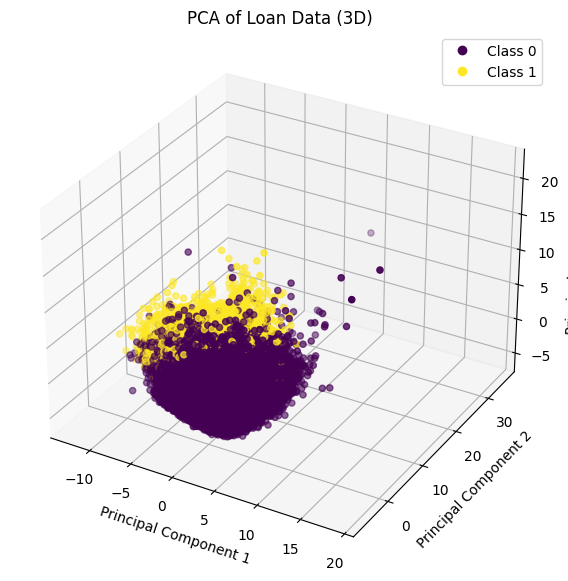

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Standardize the features
numeric_columns = X.select_dtypes(include='number').columns

scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# 2. Perform PCA
pca = PCA(n_components=3)  # You can specify the number of components or a percentage of variance to explain
X_pca = pca.fit_transform(X)

# 3. Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# 4. Interpretation: examine loadings if needed
loadings = pca.components_
print("Loadings:", loadings)

# Plot the first three principal components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis')

# Add labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of Loan Data (3D)')

# Add a legend
plt.legend(handles=scatter.legend_elements()[0], labels=['Class 0', 'Class 1'])
plt.show()

[0.10898464 0.19052938 0.2614933  0.3202914  0.3703541  0.40782823
 0.44155903 0.47147994 0.49807083 0.52355335 0.54471885 0.5645424
 0.58349704 0.60106499 0.6184089  0.63510512 0.65120351 0.66689268
 0.68207886 0.69677888 0.71140934 0.72590797 0.74007557 0.75373884
 0.76699815]


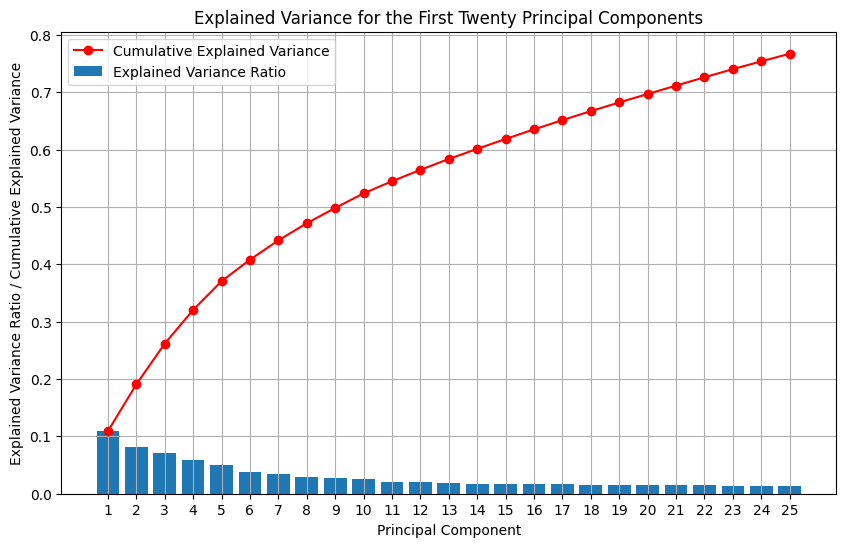

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assume X_pca contains the transformed data after PCA

# Compute PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Get explained variance for the first 25 principal components
explained_variance = pca.explained_variance_ratio_[:25]

# Compute cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)
print(cumulative_explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 26), explained_variance, align='center', label='Explained Variance Ratio')
plt.plot(range(1, 26), cumulative_explained_variance, marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio / Cumulative Explained Variance')
plt.title('Explained Variance for the First Twenty Principal Components')
plt.xticks(range(1, 26))
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Get the loadings for the first 3 principal components
first_3_pc_loadings = pca.components_[:3]

# Create a dictionary to store the feature names and their absolute loadings for the first 3 principal components
feature_loadings = {}

# Iterate through each principal component
for i, pc_loadings in enumerate(first_3_pc_loadings):
    # Get the absolute loadings for the current principal component
    abs_loadings = np.abs(pc_loadings)
    # Sort the feature indices based on their absolute loadings
    sorted_indices = np.argsort(abs_loadings)[::-1]
    # Get the top 20 features with the highest absolute loadings
    top_features = [X.columns[idx] for idx in sorted_indices[:20]]
    # Store the top features for the current principal component in the dictionary
    feature_loadings[f"Principal Component {i+1}"] = top_features

# Print the top 20 features for each principal component
for pc, features in feature_loadings.items():
    print(f"{pc}: {features}")

Principal Component 1: ['ProsperRatingCombined', 'BorrowerRate', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'EstimatedEffectiveYield', 'EstimatedLoss', 'LoanOriginalAmount', 'EstimatedReturn', 'MonthlyLoanPayment', 'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)', 'OpenCreditLines', 'ProsperScore', 'OpenRevolvingAccounts', 'CurrentCreditLines', 'OpenRevolvingMonthlyPayment', 'TotalTrades', 'Investors', 'LP_ServiceFees', 'CurrentDelinquencies']
Principal Component 2: ['DateCreditPulled', 'LoanMonthsSinceOrigination', 'ClosedDate', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'Investors', 'LP_ServiceFees', 'LP_InterestandFees', 'LoanCurrentDaysDelinquent', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LoanOriginationYear', 'ProsperScore', 'GroupKey', 'OpenCreditLines', 'ListingCategory (numeric)', 'BankcardUtilization', 'OpenRevolvingAccounts', 'CurrentCreditLines', 'Term']
Principal Component 3: ['CurrentCreditLines', 'TotalTrades', 'TotalCreditLinespa

In [22]:
# Get the loadings for the first 3 principal components
first_3_pc_loadings = pca.components_[:3]

# Create an empty set to store unique features
unique_features = set()

# Iterate through each principal component
for pc_loadings in first_3_pc_loadings:
    # Get the absolute loadings for the current principal component
    abs_loadings = np.abs(pc_loadings)
    # Sort the feature indices based on their absolute loadings
    sorted_indices = np.argsort(abs_loadings)[::-1]
    # Get the top 20 features with the highest absolute loadings
    top_features = [X.columns[idx] for idx in sorted_indices[:20]]
    # Update the set of unique features
    unique_features.update(top_features)

# Print the unique features
print("Unique Features Contributing to the First 3 Principal Components:")
print(unique_features)

Unique Features Contributing to the First 3 Principal Components:
{'DateCreditPulled', 'MonthlyLoanPayment', 'ListingCategory (numeric)', 'ProsperScore', 'LP_NetPrincipalLoss', 'Investors', 'OpenCreditLines', 'TotalCreditLinespast7years', 'CurrentCreditLines', 'FirstRecordedCreditLine', 'TotalInquiries', 'Term', 'LP_CustomerPrincipalPayments', 'GroupKey', 'LoanOriginationYear', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'LP_InterestandFees', 'OpenRevolvingAccounts', 'CreditScoreRangeLower', 'AvailableBankcardCredit', 'TradesNeverDelinquent (percentage)', 'TotalTrades', 'LP_ServiceFees', 'CurrentDelinquencies', 'EstimatedEffectiveYield', 'EstimatedReturn', 'LP_CustomerPayments', 'LoanCurrentDaysDelinquent', 'LP_GrossPrincipalLoss', 'OpenRevolvingMonthlyPayment', 'ClosedDate', 'InquiriesLast6Months', 'ProsperRatingCombined', 'BorrowerRate', 'EstimatedLoss', 'RevolvingCreditBalance', 'TradesOpenedLast6Months', 'BankcardUtilization', 'CreditScoreRangeUpper'}


### 4 - Mutual Info Classification

Feature 1: 0.0008270322504833061
Feature 2: 0.013195151546405492
Feature 3: 0.1523630241939231
Feature 4: 0.06985365892561668
Feature 5: 0.08806424840317217
Feature 6: 0.07705455401978023
Feature 7: 0.08803624260153664
Feature 8: 0.03320856169487452
Feature 9: 0.0325643731676013
Feature 10: 0.006671706906218322
Feature 11: 0.004096770667176619
Feature 12: 0.04129732004915354
Feature 13: 0.0027151051121172554
Feature 14: 0.015910743778639658
Feature 15: 0.0078534214076309
Feature 16: 0.013825396670441581
Feature 17: 0.08240968070067489
Feature 18: 0.02498933473575926
Feature 19: 0.023640982933945676
Feature 20: 0.006046050143186044
Feature 21: 0.008763908634704443
Feature 22: 0.008000194506662117
Feature 23: 0.002241311510798205
Feature 24: 0.009166561548016317
Feature 25: 0.01200056678366912
Feature 26: 0.023672384424434867
Feature 27: 0.01978501643353958
Feature 28: 0.011663784165761193
Feature 29: 0.00875750376860629
Feature 30: 0.005454553915085425
Feature 31: 0.007404413725312642
F

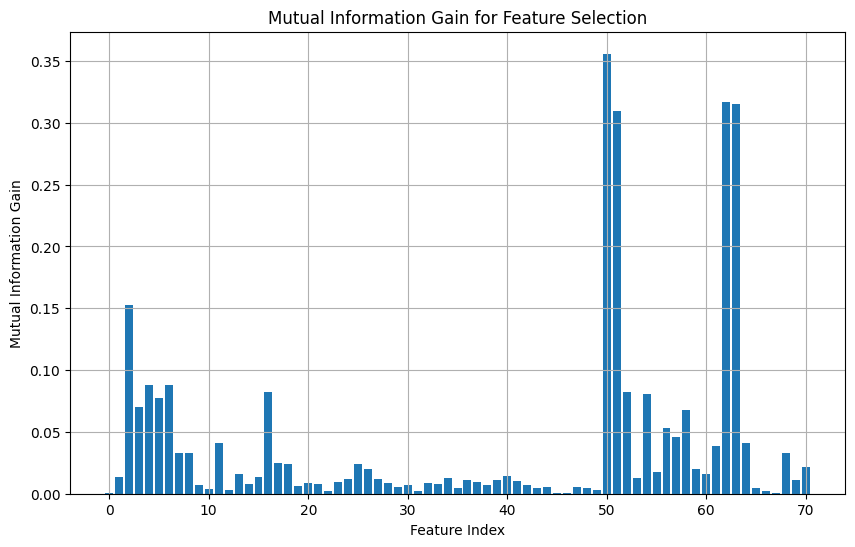

In [23]:
from sklearn.feature_selection import mutual_info_classif

# Assume X and y contain your feature matrix and target variable respectively

# Compute mutual information gain
mutual_info = mutual_info_classif(X, y)

# Print mutual information scores for each feature
for i, score in enumerate(mutual_info):
    print(f"Feature {i+1}: {score}")

# Plot mutual information scores
plt.figure(figsize=(10, 6))
plt.bar(range(len(mutual_info)), mutual_info, align='center')
plt.xlabel('Feature Index')
plt.ylabel('Mutual Information Gain')
plt.title('Mutual Information Gain for Feature Selection')
plt.grid(True)
plt.show()

In [24]:
# Create a dictionary to store column names and their mutual information gain scores
feature_mi_dict = {X.columns[i]: score for i, score in enumerate(mutual_info)}

# Sort the dictionary based on mutual information gain scores in descending order
sorted_feature_mi = sorted(feature_mi_dict.items(), key=lambda x: x[1], reverse=True)

# Print the sorted features
for feature, score in sorted_feature_mi:
    print(f"{feature}: {score}")

LoanCurrentDaysDelinquent: 0.3559286863424499
LP_GrossPrincipalLoss: 0.31657555522899716
LP_NetPrincipalLoss: 0.3149525105068012
LoanFirstDefaultedCycleNumber: 0.30981096415239373
ClosedDate: 0.1523630241939231
EstimatedEffectiveYield: 0.08806424840317217
EstimatedReturn: 0.08803624260153664
DateCreditPulled: 0.08240968070067489
LoanMonthsSinceOrigination: 0.0822313885349033
LoanOriginationQuarter: 0.0810673844743579
EstimatedLoss: 0.07705455401978023
BorrowerRate: 0.06985365892561668
LP_CustomerPrincipalPayments: 0.06755779533305661
MonthlyLoanPayment: 0.0531472620500848
LP_CustomerPayments: 0.045800637757104745
EmploymentStatus: 0.04129732004915354
LP_NonPrincipalRecoverypayments: 0.04100904842049191
LP_CollectionFees: 0.03856681852616006
Investors: 0.03329015216467979
ProsperScore: 0.03320856169487452
ListingCategory (numeric): 0.0325643731676013
CreditScoreRangeLower: 0.02498933473575926
InquiriesLast6Months: 0.023672384424434867
CreditScoreRangeUpper: 0.023640982933945676
LoanOrig

In [25]:
columns_to_keep = ['LoanCurrentDaysDelinquent', 'LP_GrossPrincipalLoss' , 'LP_NetPrincipalLoss', 'LoanFirstDefaultedCycleNumber' , 'ClosedDate',
                   'Occupation', 'ListingKey', 'MemberKey','Investors', 'LP_InterestandFees', 'DateCreditPulled','LoanOriginalAmount',
                   'LoanOriginationYear', 'ListingCategory (numeric)', 'GroupKey', 'LoanMonthsSinceOrigination', 'TradesOpenedLast6Months',
                   'EmploymentStatus', 'BorrowerState', 'TotalProsperLoans', 'Term', 'PublicRecordsLast10Years', 'TradesNeverDelinquent (percentage)',
                   'DelinquenciesLast7Years', 'InvestmentFromFriendsCount']

X =X[columns_to_keep]

In [29]:
X['LoanOriginationYear'] = X['LoanOriginationYear'].astype("float64")

In [30]:
from imblearn.over_sampling import SMOTEN
sampler = SMOTEN(random_state=0)
Xsm, ysm = sampler.fit_resample(X,y)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xsm, ysm, test_size=0.2, random_state=42)

### 5 - Model Training

#### All Model

In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

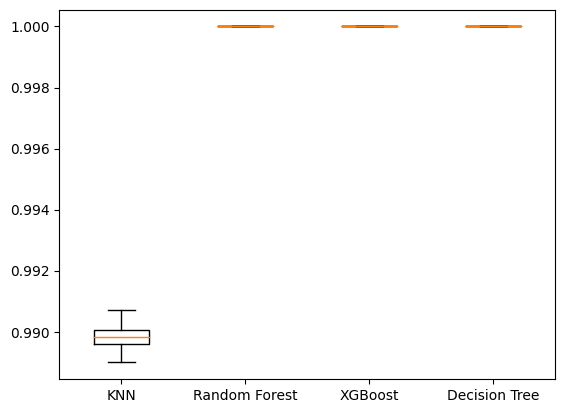

In [34]:
models = {"KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier(),
          "Decision Tree": DecisionTreeClassifier()
          }

results = []

for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

m_score = []
m_name = []
for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    report = classification_report(prediction, y_test)
    mat = confusion_matrix(prediction, y_test)
    m_name.append(name)
    m_score.append(test_score)
    print("{} Test Set Accuracy: {}".format(name, test_score))
    print("{} Confusion Matrix:\n{}".format(name, mat))
    print("{} Classification Report:\n{}".format(name, report))

KNN Test Set Accuracy: 0.9909679847315932
KNN Confusion Matrix:
[[18307   101]
 [  235 18558]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     18408
           1       0.99      0.99      0.99     18793

    accuracy                           0.99     37201
   macro avg       0.99      0.99      0.99     37201
weighted avg       0.99      0.99      0.99     37201

Random Forest Test Set Accuracy: 1.0
Random Forest Confusion Matrix:
[[18542     0]
 [    0 18659]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18542
           1       1.00      1.00      1.00     18659

    accuracy                           1.00     37201
   macro avg       1.00      1.00      1.00     37201
weighted avg       1.00      1.00      1.00     37201

XGBoost Test Set Accuracy: 1.0
XGBoost Confusion Matrix:
[[18542     0]
 [    0 18659]]

In [36]:
acc_df = pd.DataFrame({'Model_Name': m_name, 'Model_Accuracy': m_score})

In [37]:
acc_df.head()

,Model_Name,Model_Accuracy
0,KNN,0.990968
1,Random Forest,1.000000
2,XGBoost,1.000000
3,Decision Tree,1.000000


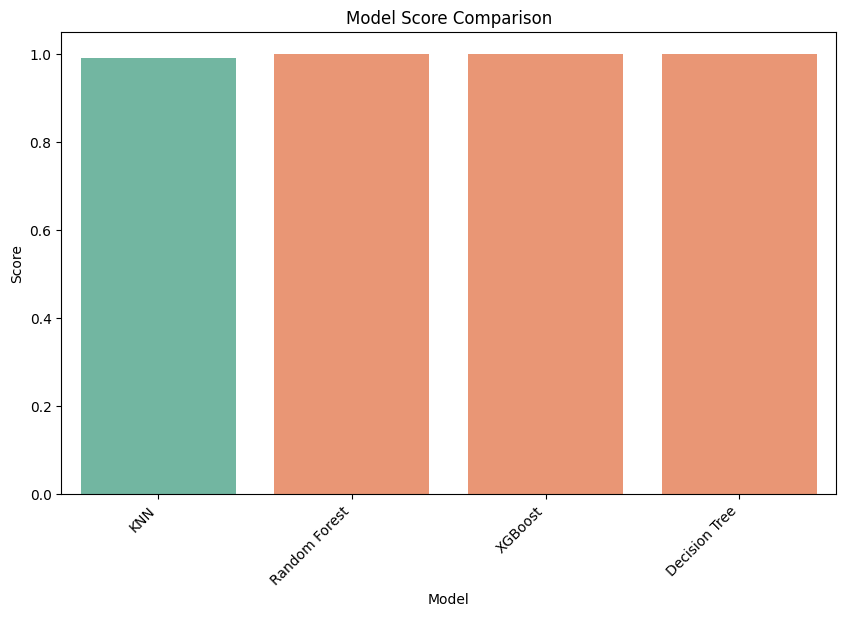

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model_Name', y='Model_Accuracy', data=acc_df, hue='Model_Accuracy', legend=False, palette='Set2')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Score Comparison')
plt.xticks(rotation=45, ha='right')
plt.show()

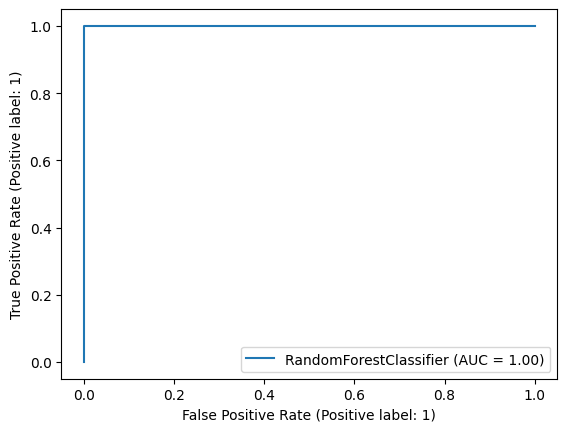

In [39]:
from sklearn.metrics import RocCurveDisplay

rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RocCurveDisplay.from_estimator(rf, X_test, y_test)

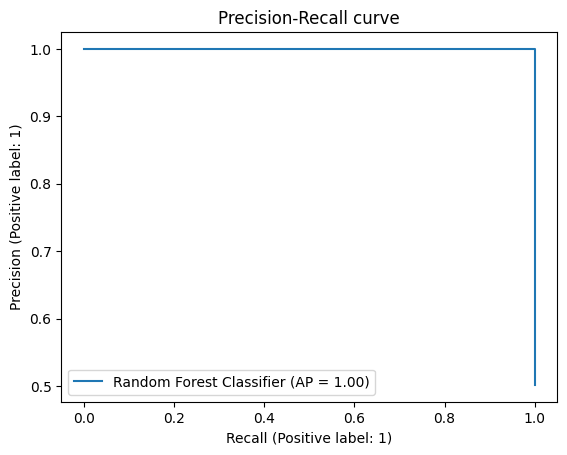

In [40]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    rf, X_test, y_test, name="Random Forest Classifier")
_ = display.ax_.set_title("Precision-Recall curve")

Text(0.5, 1.0, 'Feature Importance')

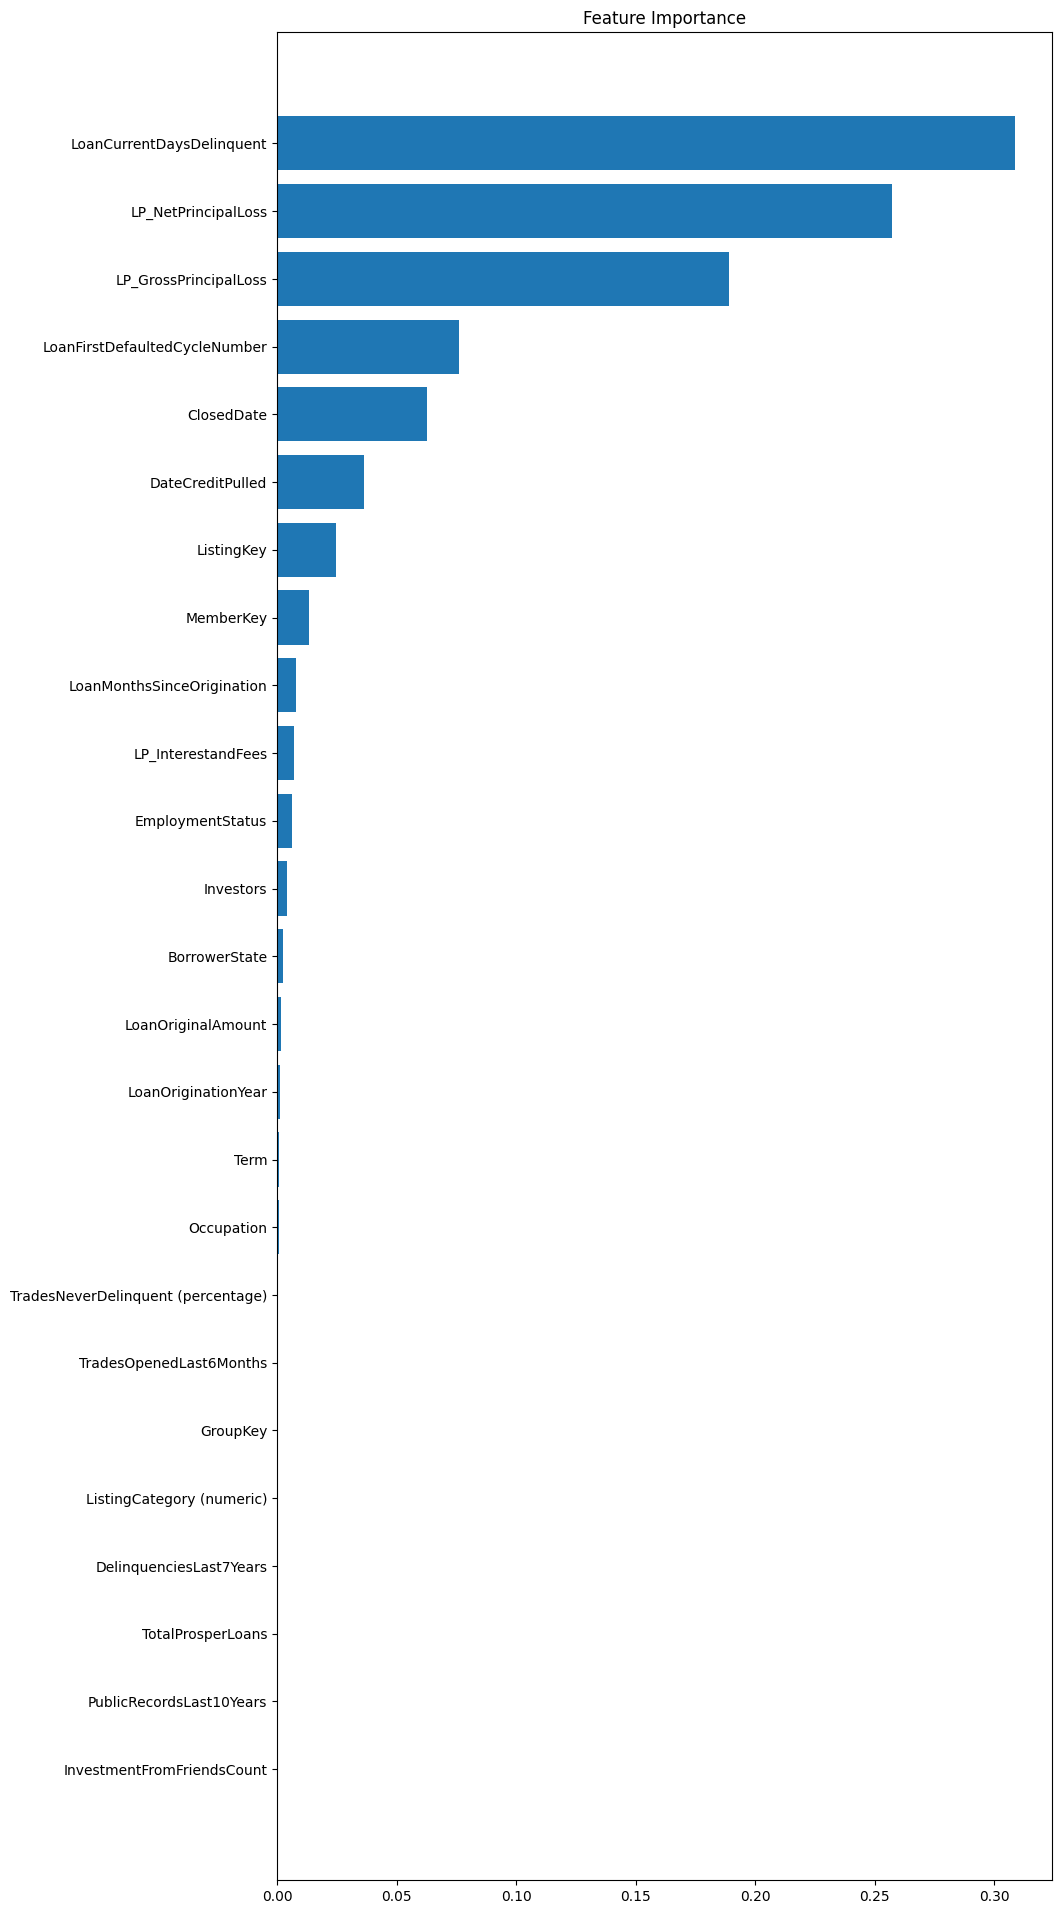

In [41]:
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 24))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance')